In [2]:
# import packages
from statsmodels.formula.api import ols
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.stats.outliers_influence import variance_inflation_factor
import pandas as pd
from datetime import datetime
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
%matplotlib inline
# allow more collumns and rows to be seen
pd.set_option('display.max_columns', 200)
pd.set_option('display.max_rows', 50)
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import SelectKBest, f_regression,mutual_info_regression
from sklearn import linear_model
from sklearn.feature_selection import RFECV
from sklearn import metrics
import scipy.stats as stats
from scipy import stats
from sklearn.linear_model import LinearRegression, LogisticRegression

In [3]:
df = pd.read_csv('decoded_mushrooms.csv')

In [3]:
df

,Unnamed: 0,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,0,poisonous,convex,smooth,brown,bruises,pungent,free,close,narrow,black,enlarging,equal,smooth,smooth,white,white,partial,white,one,pendant,black,scattered,urban
1,1,edible,convex,smooth,yellow,bruises,almond,free,close,broad,black,enlarging,club,smooth,smooth,white,white,partial,white,one,pendant,brown,numerous,grasses
2,2,edible,bell,smooth,white,bruises,anise,free,close,broad,brown,enlarging,club,smooth,smooth,white,white,partial,white,one,pendant,brown,numerous,meadows
3,3,poisonous,convex,scaly,white,bruises,pungent,free,close,narrow,brown,enlarging,equal,smooth,smooth,white,white,partial,white,one,pendant,black,scattered,urban
4,4,edible,convex,smooth,gray,no,none,free,crowded,broad,black,tapering,equal,smooth,smooth,white,white,partial,white,one,evanescent,brown,abundant,grasses
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,8119,edible,knobbed,smooth,brown,no,none,attached,close,broad,yellow,enlarging,missing,smooth,smooth,orange,orange,partial,orange,one,pendant,buff,clustered,leaves
8120,8120,edible,convex,smooth,brown,no,none,attached,close,broad,yellow,enlarging,missing,smooth,smooth,orange,orange,partial,brown,one,pendant,buff,several,leaves
8121,8121,edible,flat,smooth,brown,no,none,attached,close,broad,brown,enlarging,missing,smooth,smooth,orange,orange,partial,orange,one,pendant,buff,clustered,leaves
8122,8122,poisonous,knobbed,scaly,brown,no,fishy,free,close,narrow,buff,tapering,missing,smooth,silky,white,white,partial,white,one,evanescent,white,several,leaves


In [4]:
df.drop(['Unnamed: 0'], axis = 1, inplace = True)

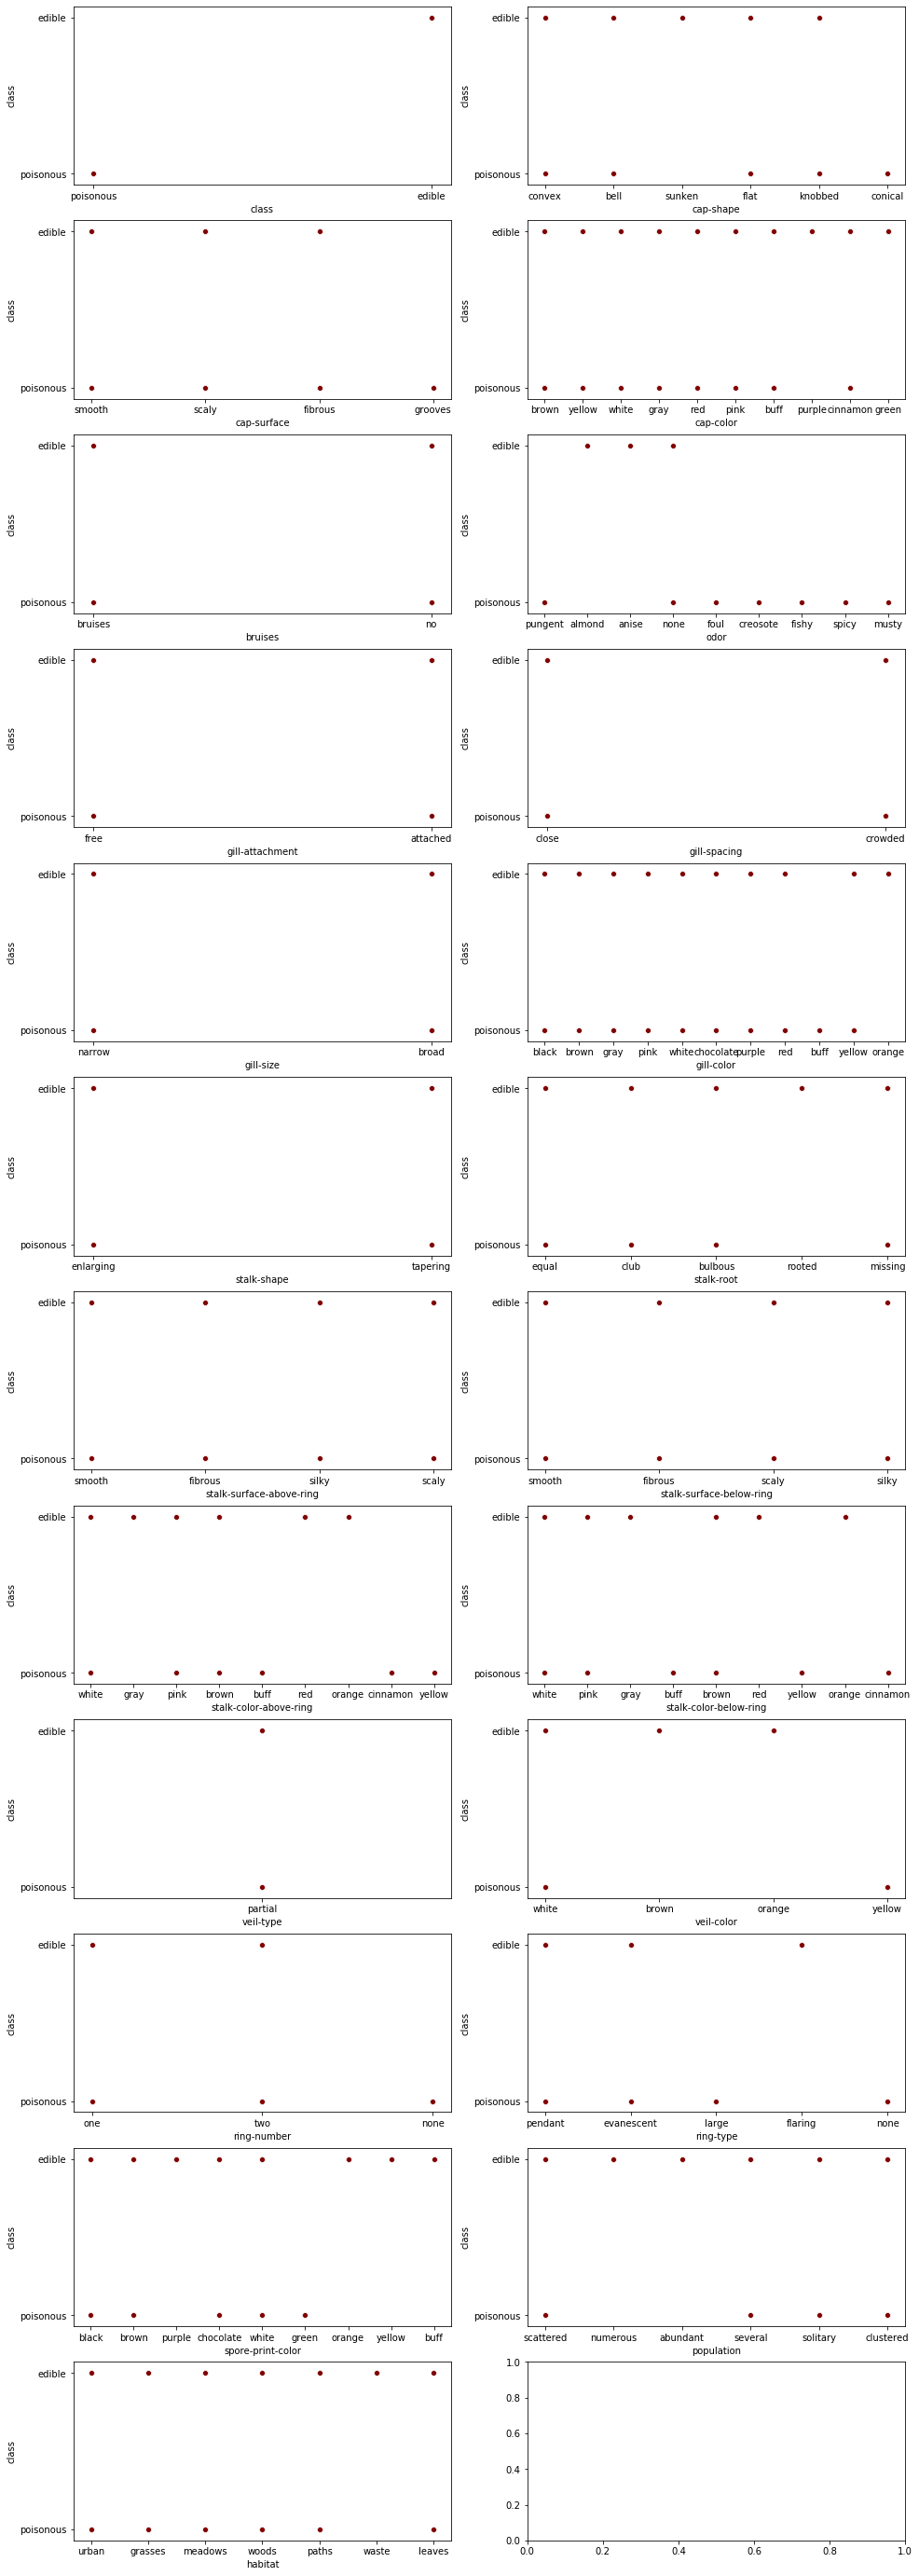

In [5]:
fig, axes = plt.subplots (nrows=12, ncols=2, figsize=(16,50))

for i, column in enumerate(df):
    sns.scatterplot(data=df, x=column, y='class', ax=axes[i//2, i%2], color = 'maroon')

In [4]:
print(df['class'].unique())
df['class'].map({'poisonous':1, 'edible':2})

['poisonous' 'edible']


0       1
1       2
2       2
3       1
4       2
       ..
8119    2
8120    2
8121    2
8122    1
8123    2
Name: class, Length: 8124, dtype: int64

In [6]:
df['class'].unique()
df['class'] = df['class'].map({'poisonous':1, 'edible':2})
df['cap-shape'].unique()
df['cap-shape'] = df['cap-shape'].map({'convex':1, 'bell':2, 'sunken':3, 'flat':4, 'knobbed':5, 'conical':6})
df['cap-surface'].unique()
df['cap-surface'] = df['cap-surface'].map({'smooth':1, 'scaly':2, 'fibrous':3, 'grooves':4})
df['cap-color'].unique()
df['cap-color'] = df['cap-color'].map({'brown':1, 'yellow':2, 'white':3, 'gray':4, 'red':5, 'pink':6, 'buff':7, 
                                       'purple':8, 'cinnamon':9, 'green': 10})
df['bruises'].unique()
df['bruises'] = df['bruises'].map({'bruises':1, 'no':2})
df['odor'].unique()
df['odor'] = df['odor'].map({'pungent':1, 'almond':2, 'anise':3, 'none':4, 'foul':5, 'creosote':6, 'fishy':7, 
                                       'spicy':8, 'musty': 9})
df['gill-attachment'].unique()
df['gill-attachment'] = df['gill-attachment'].map({'free':1, 'attached':2})
df['gill-spacing'].unique()
df['gill-spacing'] = df['gill-spacing'].map({'close':1, 'crowded':2})
df['gill-size'].unique()
df['gill-size'] = df['gill-size'].map({'narrow':1, 'broad':2})
df['gill-color'].unique()
df['gill-color'] = df['gill-color'].map({'black':1, 'brown':2, 'gray':3, 'pink':4, 'white':5, 'chocolate':6, 'purple':7, 
                                       'e':8, 'buff': 9, 'red':10, 'yellow':11, 'orange':12})
df['stalk-shape'].unique()
df['stalk-shape'] = df['stalk-shape'].map({'enlarging':1, 'tapering':2})
df['stalk-root'].unique()
df['stalk-root'] = df['stalk-root'].map({'equal':1, 'club':2, 'bulbous':3, 'rooted':4, 'missing':5})
df['stalk-surface-above-ring'].unique()
df['stalk-surface-above-ring'] = df['stalk-surface-above-ring'].map({'smooth':1, 'fibrous':2, 'silky':3, 'scaly':4})
df['stalk-surface-below-ring'].unique()
df['stalk-surface-below-ring'] = df['stalk-surface-below-ring'].map({'smooth':1, 'fibrous':2, 'scaly':3, 'silky':4})
df['stalk-color-above-ring'].unique()
df['stalk-color-above-ring'] = df['stalk-color-above-ring'].map({'white':1, 'gray':2, 'pink':3, 'brown':4, 'buff':5, 'red':6,
                                                                 'orange':7, 'cinnamon':8, 'yellow': 9})
df['stalk-color-below-ring'].unique()
df['stalk-color-below-ring'] = df['stalk-color-below-ring'].map({'white':1, 'pink':2, 'gray':3, 'buff':4, 'brown':5,
                                                                    'red':6, 'yellow':7, 'orange':8, 'cinnamon': 9})
df['veil-type'].unique()
df['veil-type'] = df['veil-type'].map({'partial':1})
df['veil-color'].unique()
df['veil-color'] = df['veil-color'].map({'white':1, 'brown':2, 'orange':3, 'yellow':4})
df['ring-number'].unique()
df['ring-number'] = df['ring-number'].map({'one':1, 'two':2, 'none':3})
df['ring-type'].unique()
df['ring-type'] = df['ring-type'].map({'pendant':1, 'evanescent':2, 'large':3, 'flaring':4, 'none':5})
df['spore-print-color'].unique()
df['spore-print-color'] = df['spore-print-color'].map({'black':1, 'brown':2, 'purple':3, 'chocolate':4, 'white':5, 'green':6, 
                                                       'orange':7, 'yellow':8, 'buff': 9})
df['population'].unique()
df['population'] = df['population'].map({'scattered':1, 'numerous':2, 'abundant':3, 'several':4, 'solitary':5, 'clustered':6})
df['habitat'].unique()
df['habitat'] = df['habitat'].map({'urban':1, 'grasses':2, 'meadows':3, 'woods':4, 'paths':5, 'waste':6, 'leaves':7})
df['class'].unique()
df['class'] = df['class'].map({'poisonous':1, 'edible':2})

In [7]:
df

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
1,2,1,1,2,1,2,1,1,2,1,1,2,1,1,1,1,1,1,1,1,2,2,2
2,2,2,1,3,1,3,1,1,2,2,1,2,1,1,1,1,1,1,1,1,2,2,3
3,1,1,2,3,1,1,1,1,1,2,1,1,1,1,1,1,1,1,1,1,1,1,1
4,2,1,1,4,2,4,1,2,2,1,2,1,1,1,1,1,1,1,1,2,2,3,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,2,5,1,1,2,4,2,1,2,11,1,5,1,1,7,8,1,3,1,1,9,6,7
8120,2,1,1,1,2,4,2,1,2,11,1,5,1,1,7,8,1,2,1,1,9,4,7
8121,2,4,1,1,2,4,2,1,2,2,1,5,1,1,7,8,1,3,1,1,9,6,7
8122,1,5,2,1,2,7,1,1,1,9,2,5,1,4,1,1,1,1,1,2,5,4,7


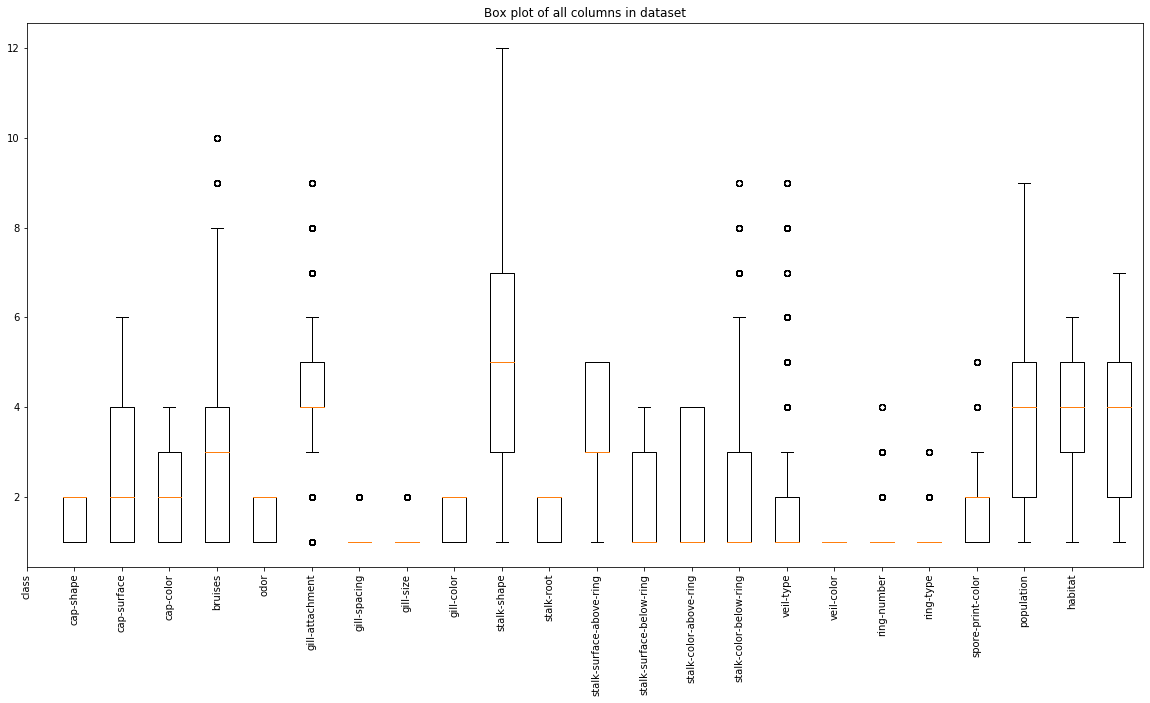

In [8]:
#-----Use this when in number format -------
plt.figure(figsize=(20, 10))
plt.boxplot([df[col] for col in df.columns])
plt.title("Box plot of all columns in dataset")
plt.xticks(range(len(df.columns.values)), df.columns.values, rotation='vertical')
plt.show()

In [9]:
df.isna().sum()

class                       0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64

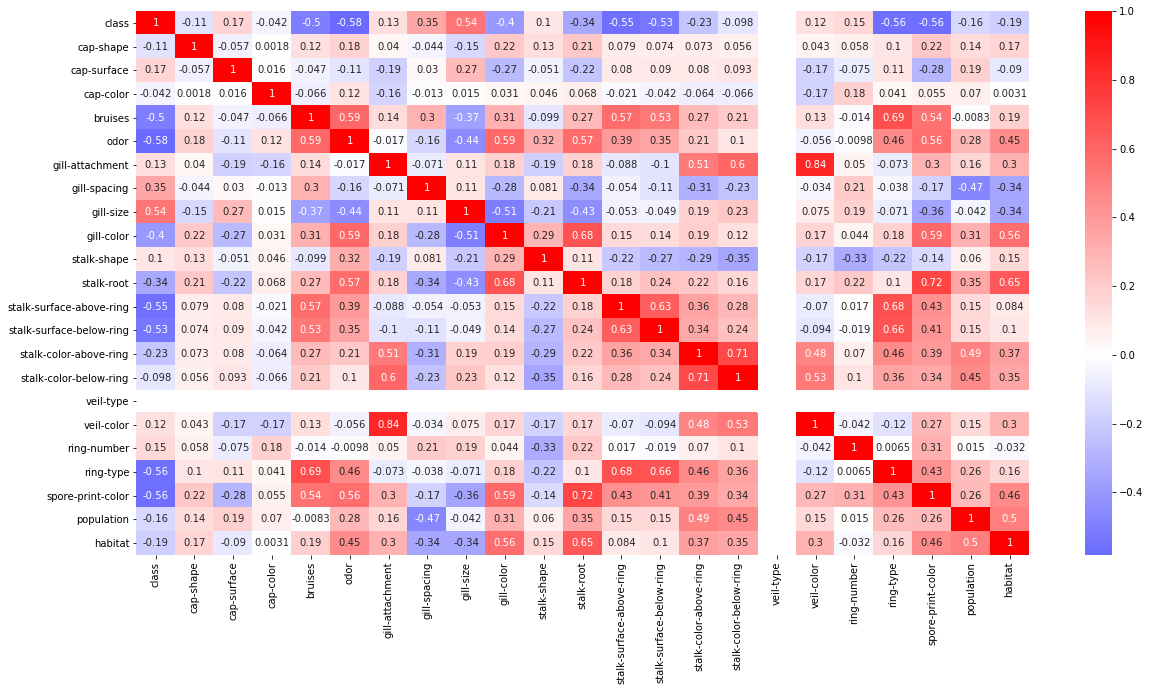

<Figure size 432x288 with 0 Axes>

In [10]:
fig, ax = plt.subplots(figsize=(20,10)) 
sns.heatmap(df.corr(), cmap='bwr', center=0, annot=True)
b, t = plt.ylim() # discover the values for bottom and top
b += 0.5 # Add 0.5 to the bottom
t -= 0.5 # Subtract 0.5 from the top
plt.ylim(b, t) # update the ylim(bottom, top) values
plt.show()

plt.savefig('images/heatmap')

#### Logistic Regression Model

In [11]:
target = df['class']
relevant_columns = ['cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor',
       'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color',
       'stalk-shape', 'stalk-root', 'stalk-surface-above-ring',
       'stalk-surface-below-ring', 'stalk-color-above-ring',
       'stalk-color-below-ring', 'veil-type', 'veil-color', 'ring-number',
       'ring-type', 'spore-print-color', 'population', 'habitat']
dummy_dataframe = pd.get_dummies(df[relevant_columns], drop_first = True)

In [13]:
# fit a logistic regression model and store the class predictions

logreg = LogisticRegression(random_state=42)
X = df[relevant_columns]
y = target
logreg.fit(X, y)
df['mushroom_pred_class'] = logreg.predict(X)

C:\Users\akams\anaconda3\envs\learn-env\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [16]:
df

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat,mushroom_pred_class
0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
1,2,1,1,2,1,2,1,1,2,1,1,2,1,1,1,1,1,1,1,1,2,2,2,2
2,2,2,1,3,1,3,1,1,2,2,1,2,1,1,1,1,1,1,1,1,2,2,3,2
3,1,1,2,3,1,1,1,1,1,2,1,1,1,1,1,1,1,1,1,1,1,1,1,1
4,2,1,1,4,2,4,1,2,2,1,2,1,1,1,1,1,1,1,1,2,2,3,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,2,5,1,1,2,4,2,1,2,11,1,5,1,1,7,8,1,3,1,1,9,6,7,2
8120,2,1,1,1,2,4,2,1,2,11,1,5,1,1,7,8,1,2,1,1,9,4,7,2
8121,2,4,1,1,2,4,2,1,2,2,1,5,1,1,7,8,1,3,1,1,9,6,7,2
8122,1,5,2,1,2,7,1,1,1,9,2,5,1,4,1,1,1,1,1,2,5,4,7,1


In [15]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df, target, test_size = 0.25, random_state = 21)
print("Training set - Features: ", X_train.shape, "Target: ", y_train.shape)
print("Training set - Features: ", X_test.shape, "Target: ",y_test.shape)

Training set - Features:  (6093, 24) Target:  (6093,)
Training set - Features:  (2031, 24) Target:  (2031,)


In [21]:
# scale the data 
scaler = StandardScaler()

# fit and transform the training 
X_train = pd.DataFrame(data=scaler.fit_transform(X_train), columns=relevant_columns)

# transform the testing 
X_test = pd.DataFrame(data=scaler.transform(X_test), columns=relevant_columns)

ValueError: Shape of passed values is (6093, 24), indices imply (6093, 22)

In [17]:
lm = LinearRegression()

lm = lm.fit(X_train, y_train)

y_train_pred = lm.predict(X_train)

train_rmse = np.sqrt(metrics.mean_squared_error(y_train, y_train_pred))


print('Training Root Mean Squared Error:' , train_rmse)

Training Root Mean Squared Error: 2.329584290280469e-15
